## 6.4 CF Task Supervised Machine Learning Regression

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Create file path
path = r'C:\Users\mgril\OneDrive\Desktop\UFC project folder'

In [4]:
# import UFC data set
df_UFC = pd.read_csv(os.path.join(path,  'Prepared data UFC', 'UFC_wrangled.csv'), index_col = False)

In [5]:
#check headers 
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,0,Royce Gracie,Patrick Smith,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,3,0,Southpaw,185.42,183.57,175,30,27
1,1,Patrick Smith,Scott Morris,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Orthodox,187.96,183.57,225,31,30
2,2,Royce Gracie,Remco Pardoel,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Southpaw,185.42,183.57,175,28,27
3,3,Remco Pardoel,Orlando Wiet,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Southpaw,190.50,183.57,260,36,30
4,4,Patrick Smith,Johnny Rhodes,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Orthodox,187.96,183.57,225,39,30


In [6]:
#remove unamed columns
df_UFC = df_UFC.drop(columns = ['Unnamed: 0'])

In [7]:
# check unnamed column dropped 
df_UFC.head()

,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,b_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,Royce Gracie,Patrick Smith,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,0,...,0,0,3,0,Southpaw,185.42,183.57,175,30,27
1,Patrick Smith,Scott Morris,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,0,...,0,0,2,0,Orthodox,187.96,183.57,225,31,30
2,Royce Gracie,Remco Pardoel,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,0,...,0,0,2,0,Southpaw,185.42,183.57,175,28,27
3,Remco Pardoel,Orlando Wiet,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,0,...,0,0,1,0,Southpaw,190.50,183.57,260,36,30
4,Patrick Smith,Johnny Rhodes,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,0,...,0,0,1,0,Orthodox,187.96,183.57,225,39,30


In [8]:
# check shape of DF
df_UFC.shape

(5901, 37)

## Data cleaning

In [9]:
df_UFC.columns

Index(['r_fighter', 'b_fighter', 'date_of_fight', 'year_of_fight', 'city',
       'state', 'country', 'winner', 'r_winner', 'b_winner', 'weight_class',
       'b_wins', 'b_losses', 'b_win_maj', 'b_win_split', 'b_win_unam',
       'b_win_tko', 'b_win_sub', 'b_win_dr_stop', 'b_stance', 'b_height_cms',
       'b_reach_cms', 'b_weight_lbs', 'r_wins', 'r_losses', 'r_win_maj',
       'r_win_split', 'r_win_unam', 'r_win_tko', 'r_win_sub', 'r_win_dr_stop',
       'r_stance', 'r_height_cms', 'r_reach_cms', 'r_weight_lbs', 'b_age',
       'r_age'],
      dtype='object')

In [10]:
# Check for missing values

df_UFC.isnull().sum()

# No missing values to handle

r_fighter        0
b_fighter        0
date_of_fight    0
year_of_fight    0
city             0
state            0
country          0
winner           0
r_winner         0
b_winner         0
weight_class     0
b_wins           0
b_losses         0
b_win_maj        0
b_win_split      0
b_win_unam       0
b_win_tko        0
b_win_sub        0
b_win_dr_stop    0
b_stance         0
b_height_cms     0
b_reach_cms      0
b_weight_lbs     0
r_wins           0
r_losses         0
r_win_maj        0
r_win_split      0
r_win_unam       0
r_win_tko        0
r_win_sub        0
r_win_dr_stop    0
r_stance         0
r_height_cms     0
r_reach_cms      0
r_weight_lbs     0
b_age            0
r_age            0
dtype: int64

In [11]:
#check for dupes
df_dups = df_UFC[df_UFC.duplicated()]
df_dups.head(20)

,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,b_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age


### Extreme values check 

C:\Users\mgril\AppData\Local\Temp\ipykernel_11780\3250862898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_UFC['r_age'], bins=25) # Shows extreme values to see if outliers need to be removed


<Axes: xlabel='r_age', ylabel='Density'>

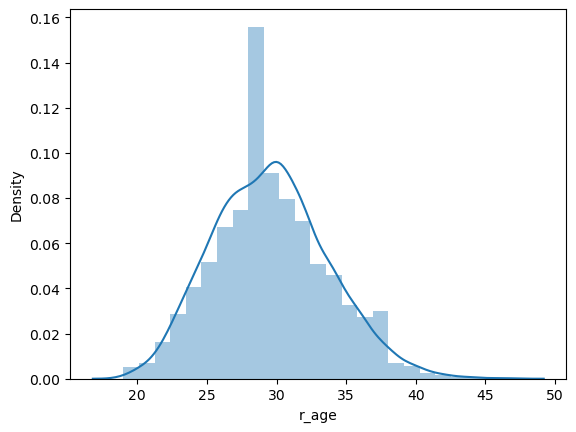

In [12]:
sns.distplot(df_UFC['r_age'], bins=25) # Shows extreme values to see if outliers need to be removed

In [13]:
df_UFC['r_age'].mean() # Check the mean

29.589730554143365

In [14]:
df_UFC['r_age'].median() # Check the median

29.0

In [15]:
df_UFC['r_age'].max() # Check the max

47

In [16]:
df_UFC['r_age'].describe()

count    5901.000000
mean       29.589731
std         4.149734
min        19.000000
25%        27.000000
50%        29.000000
75%        32.000000
max        47.000000
Name: r_age, dtype: float64

## 04. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
creating scatterplot for just the variables of red corner age related to weight classes. previous analysis has shwon blue corner and red corner ages by mean, min and average are closely related. Will test one only for a model to see if it may be applied to the other blue corner at some point. 

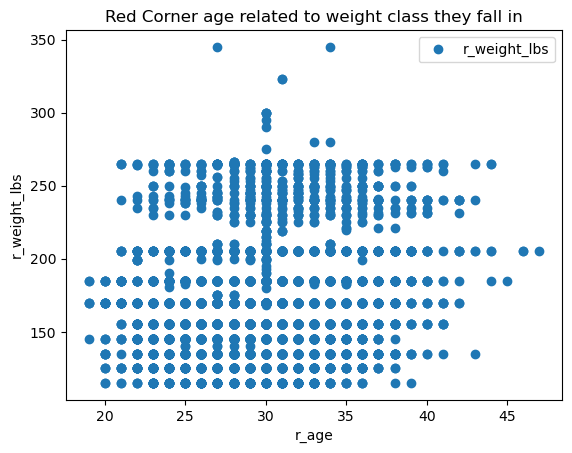

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_UFC.plot(x = 'r_age', y='r_weight_lbs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Corner age related to weight class they fall in')  
plt.xlabel('r_age')  
plt.ylabel('r_weight_lbs')  
plt.show()

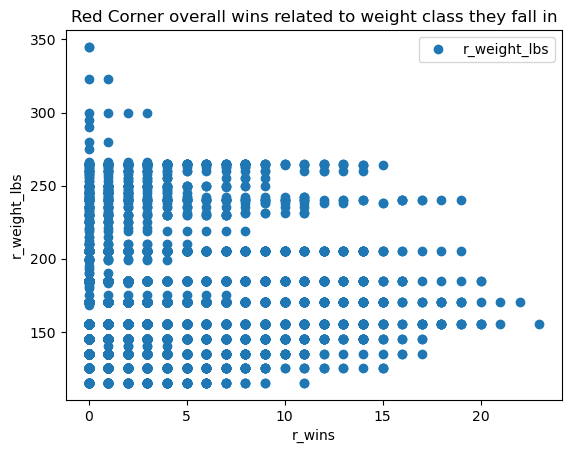

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_UFC.plot(x = 'r_wins', y='r_weight_lbs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Corner overall wins related to weight class they fall in')  
plt.xlabel('r_wins')  
plt.ylabel('r_weight_lbs')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_UFC['r_wins'].values.reshape(-1,1)
y = df_UFC['r_weight_lbs'].values.reshape(-1,1)

In [20]:
X

array([[3],
       [2],
       [2],
       ...,
       [5],
       [7],
       [4]], dtype=int64)

In [21]:
y

array([[175],
       [225],
       [175],
       ...,
       [135],
       [155],
       [170]], dtype=int64)

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

NameError: name 'y_predicted_train' is not defined

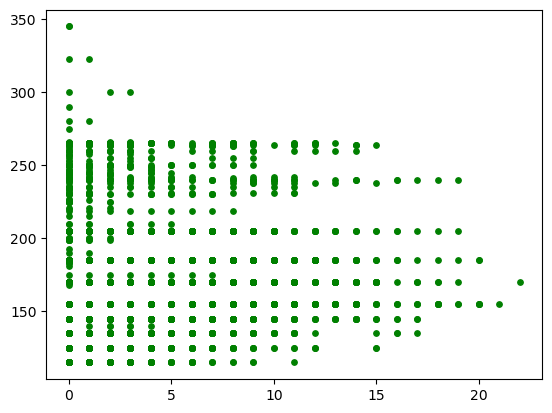

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins of Red Corner fighter vs Weight Class they fall in (Train set)')
plot_test.xlabel('r_winner')
plot_test.ylabel('r_weight_lbs')
plot_test.show()

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.50384842]]
Mean squared error:  1280.1490787926393
R2 score:  0.0029547977332664566


In [30]:
y_predicted

array([[169.94124482],
       [168.93354798],
       [174.47588061],
       ...,
       [172.96433535],
       [169.4373964 ],
       [169.4373964 ]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,185,169.941245
1,155,168.933548
2,185,174.475881
3,253,169.941245
4,205,174.979729
5,145,168.933548
6,135,168.933548
7,135,169.941245
8,115,169.941245
9,155,175.987426


## 05. State your hypothesis in a markdown cell within your Jupyter notebook.
### If the age of the fighter increases then the weight class they fight in will also increase.  

## 06. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_UFC['r_age'].values.reshape(-1,1)
y = df_UFC['r_weight_lbs'].values.reshape(-1,1)

In [33]:
X

array([[27],
       [30],
       [27],
       ...,
       [43],
       [41],
       [31]], dtype=int64)

In [34]:
y

array([[175],
       [225],
       [175],
       ...,
       [135],
       [155],
       [170]], dtype=int64)

## 07. Split the data into two sets: a training set and a test set.

In [35]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 08. Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [36]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [37]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

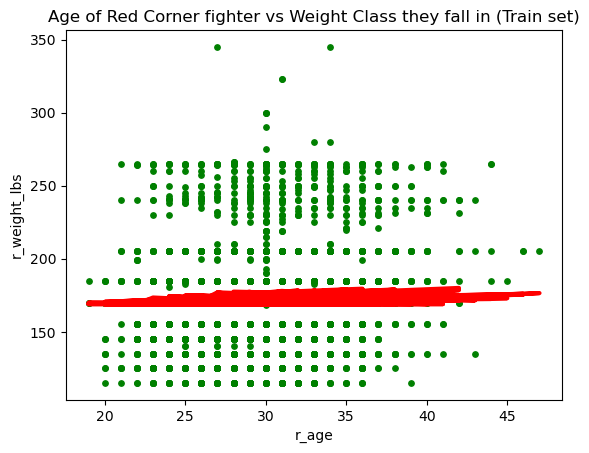

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age of Red Corner fighter vs Weight Class they fall in (Train set)')
plot_test.xlabel('r_age')
plot_test.ylabel('r_weight_lbs')
plot_test.show()

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.50395762]]
Mean squared error:  1244.7637798449534
R2 score:  0.03051466801012448


###  08. part 2 - Create a prediction for y on the test set.

In [43]:
y_predicted

array([[163.89238735],
       [165.39634498],
       [180.43592122],
       ...,
       [169.90821785],
       [174.42009072],
       [168.40426023]])

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,185,163.892387
1,155,165.396345
2,185,180.435921
3,253,171.412175
4,205,174.420091
5,145,171.412175
6,135,168.404260
7,135,174.420091
8,115,177.428006
9,155,175.924048


In [45]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

## 09. Create a plot that shows the regression line on the test set.

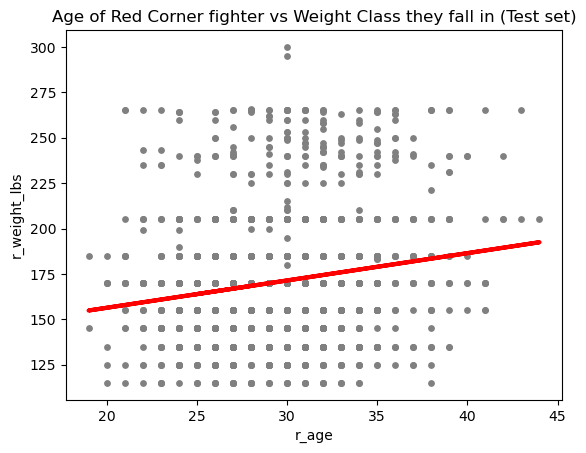

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age of Red Corner fighter vs Weight Class they fall in (Test set)')
plot_test.xlabel('r_age')
plot_test.ylabel('r_weight_lbs')
plot_test.show()

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.50395762]]
Mean squared error:  1217.8225600961937
R2 score:  0.029852693309743272


## 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### The line has a slightly positive corellation and is what I hypothesized. If age increases then weight class increases. You can clearly see this at the youngest age they have the lowest ranges of weight. Older age over 40 the weight range is much higher. This is a unique and difficult dataset to interpret though for analysis I believe. You have variables constantly changing in different directions. Hence objects on the plot are everywhere and not fixed close to the line. Red and blue corner fighters can change weight classes at anytime. They can either gain weight or lose weight to meet a weight class requirement or to meet speicifc weight criteria for a title fight. Also historically over time with this dataset upon research different weight classes did exist so there may be some possible outliers if I narrowed down to analysis for a specific year or set of years only I would remove those. I did want to keep them though as this is analysis of 1993-2021 and wanted to see it overall. 

## 11. Check the model performance statistics—MSE and R2 score.
### This was done above below the repsective plots but for review both the MSE and R2 are clear indicators both the training and test models performed poorly.  The positive slope of 1.5 on both models does indicate x rises so does y. Which aligns with as age increases so does weight. The MSE is over 1200 on both models indicating a large distance from the regression line for data within the plot. This makes sense though as each age has many different weight groups. The R2 score is around 3% on both models which is extremly bad out of possible 100% for perfect model. This simply is just not good data or variables for this type of model period. 

## 12. Compare the predicted y values with the actual y values in a dataframe.
### This was done above as well in question 08. part 2. The visual of this confirms the actual and predicted is very poor. There is some intances of weight being within 1 pound but others between 10-70 pds of difference. 

## 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
### Include any reflections you have on the impact of possible data bias. This was answered in question 11. I do not believe though there is if any very small chance of data bias for this dataset. The data being produced is purely statistical in nature and closely monitered by mutliple sources in the sports world and industry. Those producing the numbers are mostly passionate and dedicated to accurate results as the sports industry you have many constantly checking your work including colleagues, fans and stakeholders. There could be some issues of bias with the older years being less tech saavy and the person inputting the data had limited options compared to more recent years with now having advnced computing systems in place largely doing the work or fact checking its accuracy to the person inputting data. 